In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_excel("Data_Sampanis.xlsx",parse_dates=["Datetime UTC"])
df.shape

(55319, 9)

In [3]:
df.head()

,Unnamed: 0,Datetime UTC,Datetime EET(UTC+2/UTC+3),Wind Generation Forecast,Solar Generation Forcast,Load Forcast,Day-Ahead Price,Carbon Futures,Dutch TTF NG Futures
0,0,2016-12-31 22:00:00+00:00,2017-01-01T00:00UTC+02,500.0,0.0,6243,51.10,6.54,19.541
1,1,2016-12-31 23:00:00+00:00,2017-01-01T01:00UTC+02,480.0,0.0,5793,49.41,6.54,19.541
2,2,2017-01-01 00:00:00+00:00,2017-01-01T02:00UTC+02,470.0,0.0,5623,49.42,6.54,19.541
3,3,2017-01-01 01:00:00+00:00,2017-01-01T03:00UTC+02,450.0,0.0,5294,49.45,6.54,19.541
4,4,2017-01-01 02:00:00+00:00,2017-01-01T04:00UTC+02,450.0,0.0,5042,48.97,6.54,19.541


In [4]:
# Sort DataFrame in date order
df.sort_values(by=["Datetime UTC"], inplace=True, ascending=True)
df.head()

,Unnamed: 0,Datetime UTC,Datetime EET(UTC+2/UTC+3),Wind Generation Forecast,Solar Generation Forcast,Load Forcast,Day-Ahead Price,Carbon Futures,Dutch TTF NG Futures
0,0,2016-12-31 22:00:00+00:00,2017-01-01T00:00UTC+02,500.0,0.0,6243,51.10,6.54,19.541
1,1,2016-12-31 23:00:00+00:00,2017-01-01T01:00UTC+02,480.0,0.0,5793,49.41,6.54,19.541
2,2,2017-01-01 00:00:00+00:00,2017-01-01T02:00UTC+02,470.0,0.0,5623,49.42,6.54,19.541
3,3,2017-01-01 01:00:00+00:00,2017-01-01T03:00UTC+02,450.0,0.0,5294,49.45,6.54,19.541
4,4,2017-01-01 02:00:00+00:00,2017-01-01T04:00UTC+02,450.0,0.0,5042,48.97,6.54,19.541


In [5]:
df.dropna(inplace=True)
df.columns

Index(['Unnamed: 0', 'Datetime UTC', 'Datetime EET(UTC+2/UTC+3)',
       'Wind Generation Forecast', 'Solar Generation Forcast', 'Load Forcast',
       'Day-Ahead Price', 'Carbon Futures', 'Dutch TTF NG Futures'],
      dtype='object')

In [6]:
# Add datetime parameters for Datetime UTC
df["Year"] = df["Datetime UTC"].dt.year
df["Month"] = df["Datetime UTC"].dt.month
df["Day"] = df["Datetime UTC"].dt.day
df["Dayofweek"] = df["Datetime UTC"].dt.dayofweek
df["Dayofyear"] = df["Datetime UTC"].dt.dayofyear
df["Hour"]=df["Datetime UTC"].dt.hour
# Drop original date
df.drop("Datetime UTC", axis=1, inplace=True)

In [7]:
df.head()

,Unnamed: 0,Datetime EET(UTC+2/UTC+3),Wind Generation Forecast,Solar Generation Forcast,Load Forcast,Day-Ahead Price,Carbon Futures,Dutch TTF NG Futures,Year,Month,Day,Dayofweek,Dayofyear,Hour
0,0,2017-01-01T00:00UTC+02,500.0,0.0,6243,51.10,6.54,19.541,2016,12,31,5,366,22
1,1,2017-01-01T01:00UTC+02,480.0,0.0,5793,49.41,6.54,19.541,2016,12,31,5,366,23
2,2,2017-01-01T02:00UTC+02,470.0,0.0,5623,49.42,6.54,19.541,2017,1,1,6,1,0
3,3,2017-01-01T03:00UTC+02,450.0,0.0,5294,49.45,6.54,19.541,2017,1,1,6,1,1
4,4,2017-01-01T04:00UTC+02,450.0,0.0,5042,48.97,6.54,19.541,2017,1,1,6,1,2


In [8]:
# Function to return a dataframe of all spikes in a specific year
def thres(year):
    # Get all electricity prices
    prices=df[df["Year"]==year]["Day-Ahead Price"].copy()
    prices.sort_values(ascending=True,inplace=True)
    prices=prices.reset_index()
    neg_thres=prices.loc[int(len(prices)*0.05)][1]
    pos_thres=prices.loc[int(len(prices)*0.95)][1]
    return [neg_thres,pos_thres]

In [9]:
temp={}
for year in range(2016,2023+1):
    temp[year]=thres(year)

In [10]:
temp

{2016: [49.41, 51.1],
 2017: [38.07, 82.0],
 2018: [41.52, 76.2],
 2019: [39.66, 80.65],
 2020: [22.0, 76.03],
 2021: [41.6, 270.33],
 2022: [139.95, 503.86],
 2023: [59.27, 261.22]}

In [11]:
# Function that returns 1 for spike
def is_spike(price,year):
    if (price<temp[year][0] or price>temp[year][1]):
        return 1
    else:
        return 0

### We will add a column to the dataframe, which indicates whether the price is a spike (1) or not (0)

In [12]:
df['Spike'] = df.apply(lambda x: is_spike(x['Day-Ahead Price'],x['Year']), axis=1)

In [13]:
df.head()

,Unnamed: 0,Datetime EET(UTC+2/UTC+3),Wind Generation Forecast,Solar Generation Forcast,Load Forcast,Day-Ahead Price,Carbon Futures,Dutch TTF NG Futures,Year,Month,Day,Dayofweek,Dayofyear,Hour,Spike
0,0,2017-01-01T00:00UTC+02,500.0,0.0,6243,51.10,6.54,19.541,2016,12,31,5,366,22,0
1,1,2017-01-01T01:00UTC+02,480.0,0.0,5793,49.41,6.54,19.541,2016,12,31,5,366,23,0
2,2,2017-01-01T02:00UTC+02,470.0,0.0,5623,49.42,6.54,19.541,2017,1,1,6,1,0,0
3,3,2017-01-01T03:00UTC+02,450.0,0.0,5294,49.45,6.54,19.541,2017,1,1,6,1,1,0
4,4,2017-01-01T04:00UTC+02,450.0,0.0,5042,48.97,6.54,19.541,2017,1,1,6,1,2,0


In [14]:
df['Spike'].sum()

5345

### Now our target is the Spike variable

In [15]:
df1=df.copy()
df1.drop(['Day-Ahead Price'],axis=1,inplace=True)

In [16]:
df1.head()

,Unnamed: 0,Datetime EET(UTC+2/UTC+3),Wind Generation Forecast,Solar Generation Forcast,Load Forcast,Carbon Futures,Dutch TTF NG Futures,Year,Month,Day,Dayofweek,Dayofyear,Hour,Spike
0,0,2017-01-01T00:00UTC+02,500.0,0.0,6243,6.54,19.541,2016,12,31,5,366,22,0
1,1,2017-01-01T01:00UTC+02,480.0,0.0,5793,6.54,19.541,2016,12,31,5,366,23,0
2,2,2017-01-01T02:00UTC+02,470.0,0.0,5623,6.54,19.541,2017,1,1,6,1,0,0
3,3,2017-01-01T03:00UTC+02,450.0,0.0,5294,6.54,19.541,2017,1,1,6,1,1,0
4,4,2017-01-01T04:00UTC+02,450.0,0.0,5042,6.54,19.541,2017,1,1,6,1,2,0


### Split the data into X & Y

In [17]:
X=df1.drop(["Spike","Unnamed: 0","Datetime EET(UTC+2/UTC+3)"],axis=1)
y=df1["Spike"]

In [18]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Assuming X_num represents your numerical feature data and y represents your labels
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_sequence=X_train.values.tolist()
for i in range (len(X_train_sequence)):
    for j in range(11):
        X_train_sequence[i][j]=[X_train_sequence[i][j]]
X_train=np.array(X_train_sequence)
y_train_sequence=y_train.values.tolist()
y_train=np.array(y_train_sequence)


X_val_sequence=X_val.values.tolist()
for i in range (len(X_val_sequence)):
    for j in range(11):
        X_val_sequence[i][j]=[X_val_sequence[i][j]]
X_val=np.array(X_val_sequence)
y_val_sequence=y_val.values.tolist()
y_val=np.array(y_val_sequence)



# Define the custom Transformer-based model architecture
class TransformerClassifier(tf.keras.Model):
    def __init__(self, num_layers, d_model, num_heads, dff, input_shape, num_classes, rate=0.1):
        super(TransformerClassifier, self).__init__()
        self.num_layers = num_layers
        
        # Embedding layer for numerical features
        self.embedding = tf.keras.layers.Dense(d_model, input_shape=input_shape)
        
        # Transformer layers
        self.encoder_layers = [TransformerEncoderLayer(d_model, num_heads, dff, rate) 
                               for _ in range(num_layers)]
        
        # Final classification layer
        self.flatten = tf.keras.layers.Flatten()
        self.final_layer = tf.keras.layers.Dense(num_classes, activation='sigmoid')
        
    def call(self, inputs, training=True):
        x = self.embedding(inputs)
        
        # Pass through Transformer layers
        for i in range(self.num_layers):
            x = self.encoder_layers[i](x, training=training)
        
        x = self.flatten(x)
        output = self.final_layer(x)
        return output

class TransformerEncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(TransformerEncoderLayer, self).__init__()

        self.mha = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model)
        self.ffn = tf.keras.Sequential([
            tf.keras.layers.Dense(dff, activation='relu'),
            tf.keras.layers.Dense(d_model)
        ])
        
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
        
    def call(self, x, training=True):
        attn_output = self.mha(x, x, x)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)
        
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)
        
        return out2

# Parameters for the Transformer model
num_layers = 4
d_model = 64
num_heads = 4
dff = 128
input_shape = X_train.shape[1:]
num_classes = 1  # Binary classification

# Instantiate the Transformer-based model
model = TransformerClassifier(num_layers, d_model, num_heads, dff, input_shape, num_classes)

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32
)

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')


Epoch 1/10
1341/1341 [==============================] - 170s 116ms/step - loss: 0.3297 - accuracy: 0.8998 - val_loss: 0.3180 - val_accuracy: 0.9023
Epoch 2/10
1341/1341 [==============================] - 98s 73ms/step - loss: 0.3241 - accuracy: 0.8998 - val_loss: 0.3102 - val_accuracy: 0.9023
Epoch 3/10
1341/1341 [==============================] - 101s 75ms/step - loss: 0.3205 - accuracy: 0.8998 - val_loss: 0.3098 - val_accuracy: 0.9023
Epoch 4/10
1341/1341 [==============================] - 64s 48ms/step - loss: 0.3160 - accuracy: 0.8998 - val_loss: 0.3000 - val_accuracy: 0.9023
Epoch 5/10
1341/1341 [==============================] - 63s 47ms/step - loss: 0.3120 - accuracy: 0.8999 - val_loss: 0.3068 - val_accuracy: 0.9023
Epoch 6/10
1341/1341 [==============================] - 66s 49ms/step - loss: 0.3087 - accuracy: 0.8999 - val_loss: 0.2954 - val_accuracy: 0.9022
Epoch 7/10
1341/1341 [==============================] - 65s 48ms/step - loss: 0.3073 - accuracy: 0.8998 - val_loss: 0.294

In [19]:
predictions=model.predict(X_val)

336/336 [==============================] - 7s 15ms/step


In [20]:
predictions

array([[0.03474154],
       [0.04675529],
       [0.13920002],
       ...,
       [0.1155389 ],
       [0.08573584],
       [0.05086691]], dtype=float32)

In [27]:
# Threshold for classification
threshold = 0.5

# Convert probabilities to binary predictions
predictions = (predictions >= threshold).astype(int)

predictions[:30]


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [28]:
y_val[:30]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
# Calculate accuracy 
from sklearn.metrics import accuracy_score,classification_report
accuracy=accuracy_score(y_val,predictions)
print("Accuracy: ",accuracy)

Accuracy:  0.9025913497390008


In [33]:
print("Classification Report")
print(classification_report(y_val,predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      9680
           1       0.64      0.01      0.01      1048

    accuracy                           0.90     10728
   macro avg       0.77      0.50      0.48     10728
weighted avg       0.88      0.90      0.86     10728



336/336 [==============================] - 5s 16ms/step


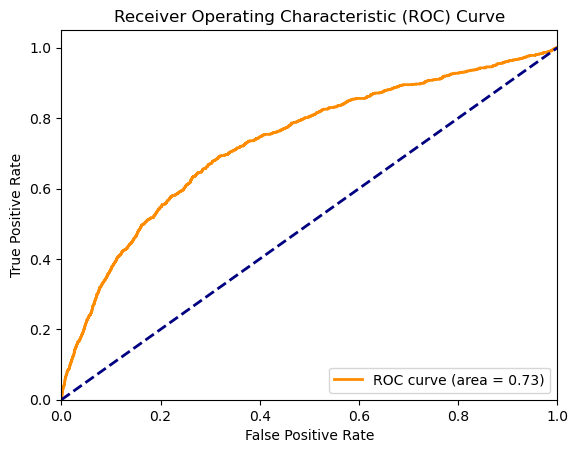

In [35]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

 
probabilities=model.predict(X_val)
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_val, probabilities)

# Compute AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [37]:
import pickle

In [38]:
with open('model_filename.pkl', 'wb') as file:
    pickle.dump(model, file)

INFO:tensorflow:Assets written to: ram://c4aa203c-0b7e-4d8f-9e59-ee021e9bc787/assets


INFO:tensorflow:Assets written to: ram://c4aa203c-0b7e-4d8f-9e59-ee021e9bc787/assets
